# Synthetic DICOM dataset

This notebook demonstrates use of [scikit-rt](https://scikit-rt.github.io/scikit-rt/) to create a synthetic image, with associated structure set, and to write as a patient dataset in DICOM format.

## Module import and configuration

The following imports modules needed for this example, defines the path to the output directory, and sets some options.

In [1]:
from pathlib import Path
from shutil import rmtree

import numpy as np

from skrt import Image, Patient
from skrt.core import Defaults
from skrt.simulation import make_head

# Define path to directory for writing output.
outdir = "synthetic_dicom"

# Set random-number seed.
np.random.seed(1)

# In place of interactive images, display static graphics that can be saved with notebook.
# Defaults().no_ui = True
# Omit user part of paths when printing object attributes.
# Defaults().compress_user = True

## Create and write synthetic data

A synthetic image featuring a loose approximation of a head is created using the function [skrt.simulation.make_head()](https://github.com/scikit-rt/scikit-rt/blob/003bf49281d2d00b74d76757d67534db485b9971/src/skrt/simulation.py#L643).  The function includes some randomisation of geometrical parameters, so that the image generated is slightly different each time.

Each synthetic image, and its associated structure set, is written as a set of files in DICOM format.

In [2]:
# Set the number of images to generate.
n_image = 1

# Define label to be assigned to structure set.
structure_set_label = "Geometric head"    

# Generate required number of images, write as DICOM datasets,
# and store the path to the top-level directory of each dataset.
paths = []
for idx in range(n_image):
    patient_id = f"{(idx + 2):03d}"
    im = make_head()
    paths.append(im.write_dicom_dataset(
        patient_id=patient_id, structure_set_label=structure_set_label, outdir=outdir))

## Checking data written to DICOM files

In the following, one of the datasets written is loaded to a [skrt.patient.Patient](https://github.com/scikit-rt/scikit-rt/blob/57915b98461feffcdeb80f99de9e135456656003/src/skrt/patient.py#L1005) object.  The dataset image and associated structure set are displayed; then DICOM data are shown for one image slice and the structure set.

In [3]:
# Load dataset.
idx = 0
p = Patient(paths[idx])

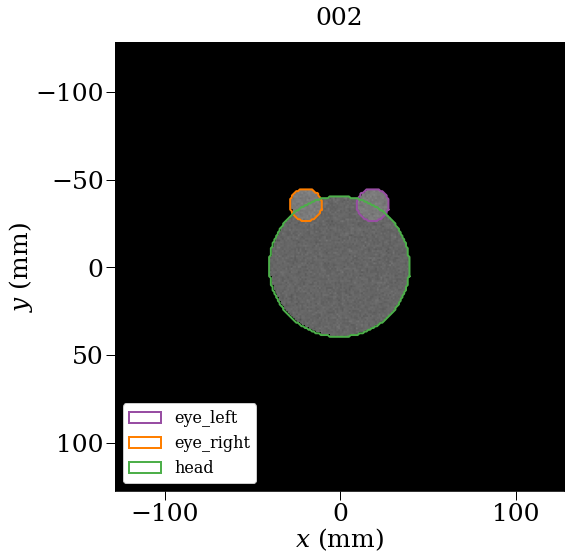

In [4]:
# Display image and associated structure set.
p.get_images()[0].view(rois=p.get_structure_sets()[0], init_roi="eye_left",
                       title=p.id, figsize=8, legend=True);

In [5]:
# Show DICOM data for image slice.
print(p.get_images()[0].get_dicom_dataset())

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.74360920285008587320979469292.9
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.2.3.0
(0002, 0013) Implementation Version Name         SH: 'pydicom-2.3.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20230716'
(0008, 0013) Instance Creation Time              TM: '124451'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP

In [6]:
# Show DICOM data for structure set.
print(p.get_structure_sets()[0].get_dicom_dataset())

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Structure Set Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.10560896633190375377153268867
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.2.3.0
(0002, 0013) Implementation Version Name         SH: 'pydicom-2.3.0'
-------------------------------------------------
(0008, 0012) Instance Creation Date              DA: '20230716'
(0008, 0013) Instance Creation Time              TM: '124451'
(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.10560896633190375377153268867
(0008, 0020) Study Date                      